In [1]:
# VARIATIONAL AUTOENCODER
# NECESSARY IMPORT
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np

In [3]:
# LOADING THE DATASET
(X_train, Y_train),(X_test, Y_test) = keras.datasets.fashion_mnist.load_data()
print("X_train Shape: ", X_train.shape, "X_test Shape: ", X_test.shape)

X_train Shape:  (60000, 28, 28) X_test Shape:  (10000, 28, 28)


In [4]:
# NORMALIZING THE TRAIN DATA
X_train = X_train / 255.0

In [5]:
# # NORMALIZING THE TEST DATA
X_test = X_test / 255.0

In [6]:
# VARIATIONAL AUTO ENCODERS

In [7]:
# COMPRESSED REPRESENTATION OF INPUT DATA
# NUMBER OF FEATURES IN COMPRESSED REPRESENTATION IS 10
codings_size = 10

In [8]:
# OUTPUT OF ENCODER IS MEAN AND LOG OF VARIANCE
# GENERATING A SAMPLES FROM NORMAL DISTRIBUTION
# THIS WILL ACT AS CUSTOM LAYER IN ENCODER
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [10]:
# ENCODER PART
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])
print("codings_mean shape: ", codings_mean.shape, "codings_log_var shape: ", codings_log_var.shape, "codings shape: ", codings.shape)

codings_mean shape:  (None, 10) codings_log_var shape:  (None, 10) codings shape:  (None, 10)


In [11]:
# DECODER PART
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

In [12]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

In [13]:
# TIME TO ADD LATENT LOSS AND RECONSTRUCTION LOSS
# RECONSTRUCTION LOSS IS NOTHING BUT BINARY CROSS-ENTROPY

In [14]:
# LATENT LOSS IS NOTHING BUT KL-DIVERGENCE BETWEEN TRUE INPUT PROBABILITY DISTRIBUTION AND DISTRIBUTION RETURNED BY ENCODER
latent_loss = -0.5 * K.sum(1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.0)

In [15]:
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [16]:
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128, validation_split=0.1)

Epoch 1/25
422/422 [==============================] - 4s 6ms/step - loss: 0.3899 - val_loss: 0.3602
Epoch 2/25
422/422 [==============================] - 3s 6ms/step - loss: 0.3437 - val_loss: 0.3477
Epoch 3/25
422/422 [==============================] - 2s 6ms/step - loss: 0.3335 - val_loss: 0.3357
Epoch 4/25
422/422 [==============================] - 2s 6ms/step - loss: 0.3283 - val_loss: 0.3290
Epoch 5/25
422/422 [==============================] - 2s 6ms/step - loss: 0.3252 - val_loss: 0.3257
Epoch 6/25
422/422 [==============================] - 3s 6ms/step - loss: 0.3228 - val_loss: 0.3240
Epoch 7/25
422/422 [==============================] - 3s 6ms/step - loss: 0.3212 - val_loss: 0.3206
Epoch 8/25
422/422 [==============================] - 3s 6ms/step - loss: 0.3198 - val_loss: 0.3234
Epoch 9/25
422/422 [==============================] - 3s 7ms/step - loss: 0.3187 - val_loss: 0.3215
Epoch 10/25
422/422 [==============================] - 2s 6ms/step - loss: 0.3178 - val_loss: 0.3185

In [17]:
def plot_image(img):
    plt.imshow(img, cmap="binary")
    plt.show()
def show_reconstructions(model, images=X_test, n_images=5):
    rand_indices = np.random.randint(low=0, high=X_test.shape[0], size=n_images)
    reconstructions = model.predict(images[rand_indices])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

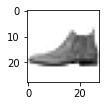

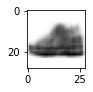

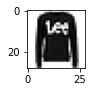

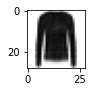

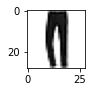

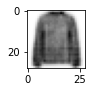

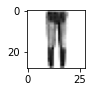

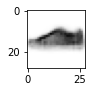

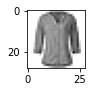

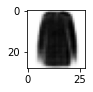

In [17]:
# PLOTTING RANDOM 5 IMAGES FROM TEST DATASET AND PREDICTION OF VAE
show_reconstructions(variational_ae, X_test, 5)
plt.show()

In [63]:
# SAMPLE RANDOM CODING FROM GAUSSIAN DISTRIBUTION

In [22]:
# codings = tf.random.normal(shape=[12, codings_size])

In [26]:
# images = variational_decoder(codings).numpy()

In [28]:
# images.shape

(12, 28, 28, 1)

In [30]:
# show_reconstructions(variational_ae, images, 1)
# plt.show()

(10000, 28, 28)

In [19]:
p = variational_ae.predict(X_test)

In [20]:
p.shape

(10000, 28, 28)